<h1 style="color:#6B7A8F;"><strong>MOBA Chat Moderator</strong></h1>

<h3 style="color:#6B7A8F;"><strong>EDA</strong></h3>

In [1]:
# --- Librerías ---
import pandas as pd
import sys
import os

sys.path.append(os.path.abspath('../src'))
from eda import run_basic_eda, run_eda_visualizations, display_sentiment_breakdown, display_extreme_comments_by_sentiment, mark_specific_toxic_phrases

# --- Cargar DF ---
df = pd.read_csv("../data/processed/df_final.csv")

In [2]:
# --- Basic EDA ---
run_basic_eda(df)


--- Estadísticas Básicas ---

Número total de comentarios: 38447
              Conteo  Porcentaje (%)
binary_label                        
0              29607       77.007309
1               8840       22.992691
Observación: La clase 'No Tóxico' es significativamente más abundante.
                   Conteo  Porcentaje (%)
multi_label                              
No Tóxico           27357       71.155097
Gravemente Tóxico    5979       15.551278
Levemente Tóxico     2861        7.441413
Acción/Juego         2250        5.852212
Observación: Las clases de toxicidad ('Levemente Tóxico', 'Gravemente Tóxico') son minoritarias.
                Conteo  Porcentaje (%)
original_label                        
O                26611       69.214763
E                 4711       12.253232
A                 2299        5.979660
I                 2274        5.914636
0                 1392        3.620569
2                  636        1.654225
1                  524        1.362915
Observación: Es


--- Comienza la Sección de Visualizaciones EDA ---

--- Generando gráficos de barras de distribuciones ---


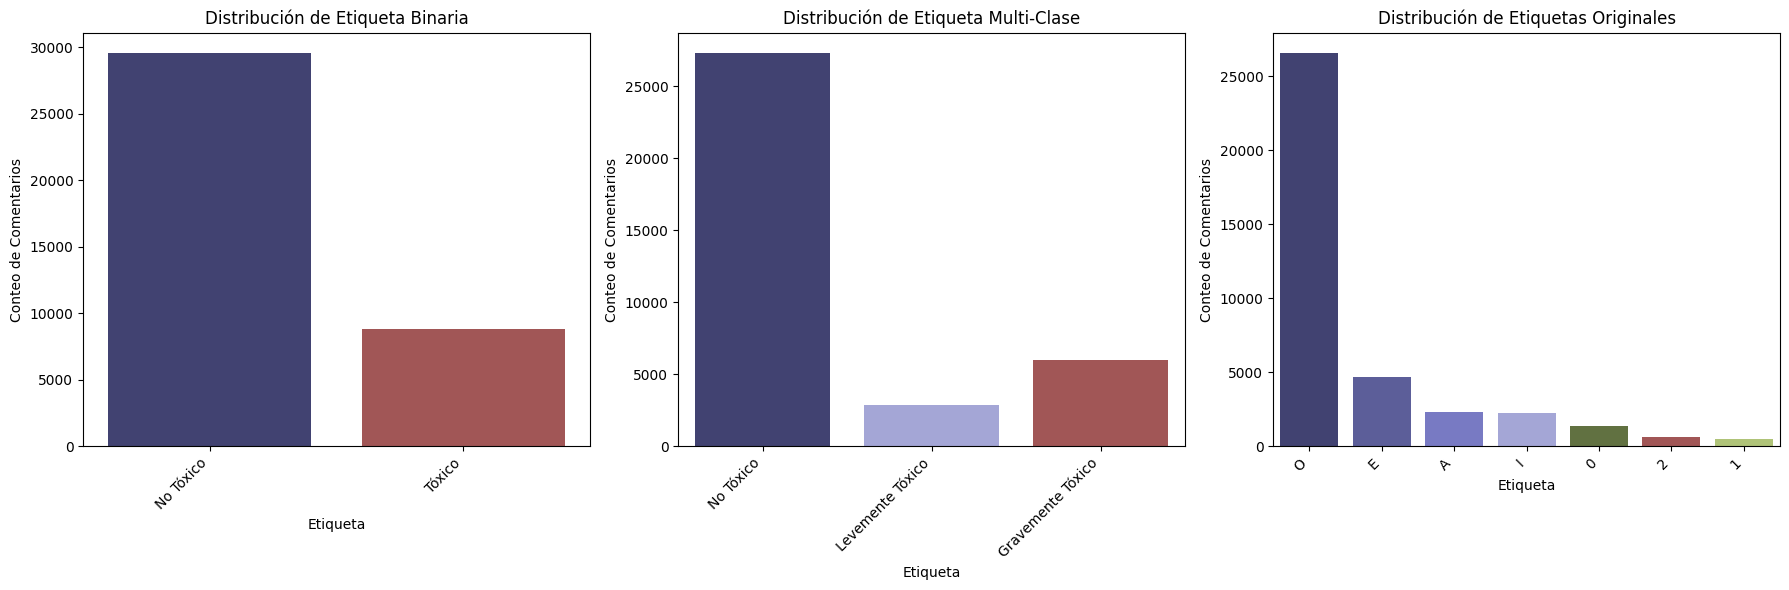


--- Generando nubes de palabras ---


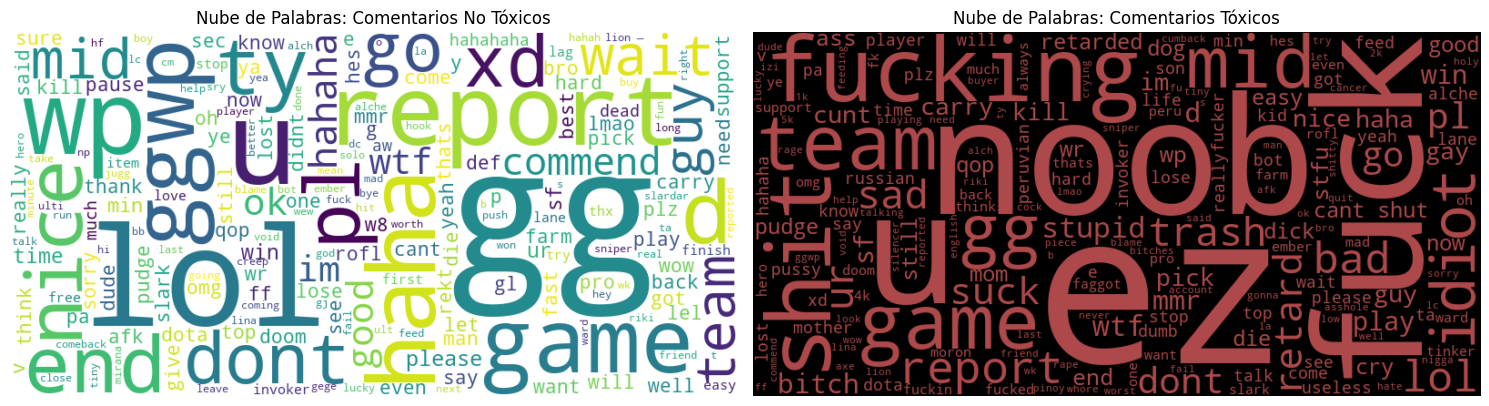

In [3]:
run_eda_visualizations(df, text_column='text_cleaned', label_column='binary_label')


---

<h2 style="color:#6B7A8F;">Conclusiones del EDA Básico</h2>

<p>Tras la fase de Análisis Exploratorio de Datos (EDA) y la visualización de las distribuciones y el contenido de los comentarios, hemos extraído las siguientes conclusiones clave:</p>

---

<h3 style="color:#6B7A8F;">1. Distribución de Etiquetas de Toxicidad</h3>

<ul>
    <li><b>Desequilibrio Significativo en la Etiqueta Binaria:</b> Hemos observado un claro desequilibrio en la distribución de la etiqueta binaria, con un <b>77.01% de comentarios no tóxicos</b> frente a un <b>22.99% de comentarios tóxicos</b>. Aunque la mayoría de los comentarios no son tóxicos, un casi cuarto de los mismos sí lo son, lo cual es un porcentaje alarmantemente alto y sugiere una prevalencia notable de comportamientos negativos en el chat del juego. Este desequilibrio requerirá una atención especial durante el proceso de modelado para evitar que el modelo se incline excesivamente hacia la clase mayoritaria "No Tóxico".</li>
    <li><b>Patrones en la Etiqueta Multiclase:</b> La distribución multiclase revela que los comentarios <b>"Gravemente Tóxicos" (15.55%) son más comunes que los "Levemente Tóxicos" (7.44%)</b>. Esta es una observación interesante, ya que parece que cuando los usuarios se expresan de forma tóxica, tienden a hacerlo con un alto grado de agresividad. También es notable que la toxicidad grave sea más frecuente que los comentarios de "Acción/Juego" (5.85%), lo que sugiere que la tendencia a insultar es más predominante que los avisos o las llamadas a la acción dentro del juego. Esto subraya la necesidad de un sistema de moderación efectivo.</li>
    <li><b>Variabilidad en el Dataset Original:</b> Al examinar las etiquetas originales (provenientes del segundo dataset), se aprecia una distribución más equitativa de la toxicidad en comparación con la etiqueta binaria general. Por ejemplo, la categoría '2' (1.65%) está más cerca de '0' (3.62%) que el 22.99% general de toxicidad binaria. Esto podría indicar que la prevalencia de toxicidad <b>varía considerablemente entre diferentes contextos o "partidas"</b> dentro del juego, lo que refuerza la idea de que la toxicidad no es un problema uniforme sino que puede concentrarse en ciertas situaciones o grupos de usuarios.</li>
</ul>

---

<h3 style="color:#6B7A8F;">2. Longitud de los Comentarios</h3>

<ul>
    <li><b>Comentarios Concisos:</b> La longitud promedio de los comentarios es de <b>16.77 caracteres</b> y el promedio de palabras es de <b>alrededor de 3.6 palabras</b>. Con una longitud máxima de 392 caracteres, la mayoría de los comentarios son bastante cortos y directos. Esto implica que el modelo deberá ser capaz de identificar la toxicidad incluso en frases muy breves y concisas. Para el preprocesamiento, esto sugiere que la tokenización y el análisis de frases cortas serán cruciales, y que quizás no se necesiten modelos que manejen dependencias a muy largo plazo.</li>
</ul>

---

<h3 style="color:#6B7A8F;">3. Análisis de Palabras Clave (Nubes de Palabras)</h3>

<ul>
    <li><b>Comentarios No Tóxicos:</b> Las palabras más frecuentes reflejan la dinámica normal del juego y la comunicación amistosa: <code>gg, lol, u, game, ggwp, haha, end, report, pl, wp, xd, good, wait, go, mid, commend, nice, ty, wtf, guy, im, sf, play, pro, really, afk, kill, carry, back, now, time, team, dont, feed, say, hard, lmao, want</code>. Se observan muchas abreviaciones comunes en juegos ("gg", "lol", "ggwp", "xd") y términos relacionados con el juego ("game", "mid", "report", "feed", "kill", "carry", "team").</li>
    <li><b>Comentarios Tóxicos:</b> Las palabras más prominentes son claramente ofensivas y agresivas: <code>ez, noob, u, fuck, go, mid, idiot, fucking, game, trash, shit, lol, gg, suck, pl, report, sad, bad, ur, cunt, ass, hard, fucker, play, bitch, retard, cry, guy, kid, stfu, cancer, suck, please, feed, gay, pussy, easy, russian, sniper, nigga, peru, whore</code>. Es notable la presencia de insultos directos, lenguaje vulgar y términos despectivos. Algunas palabras como "u", "go", "mid", "game", "lol", "gg", "pl", "report", "feed" aparecen en ambas categorías, lo que subraya la importancia del <b>contexto y el tono</b> para determinar la toxicidad de un comentario.</li>
</ul>



--- Distribución de Sentimiento en Comentarios No Tóxicos (text) ---
                      Conteo  Porcentaje (%)
sentiment                                   
Neutral                13638       46.063431
Positivo               12647       42.716250
Negativo (No Tóxico)    3322       11.220320


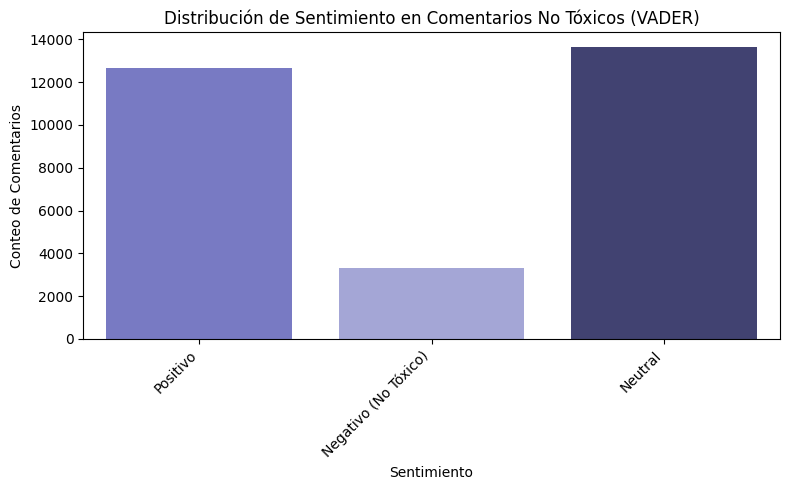

In [4]:
# --- Análisis de Sentimiento para Comentarios NO TÓXICOS ---
display_sentiment_breakdown(df, text_column='text', label_column='binary_label', label_value=0)

"No tóxico" no es sinónimo de "positivo". La comunicación no tóxica en el chat se divide casi a partes iguales entre comentarios neutrales y positivos, pero también incluye una porción no despreciable de comentarios con un sentimiento negativo, que son relevantes para entender la experiencia del usuario sin ser necesariamente problemáticos en términos de toxicidad.


--- Distribución de Sentimiento en Comentarios Tóxicos (text) ---
                      Conteo  Porcentaje (%)
sentiment                                   
Negativo (No Tóxico)    4282       48.438914
Positivo                2811       31.798643
Neutral                 1747       19.762443


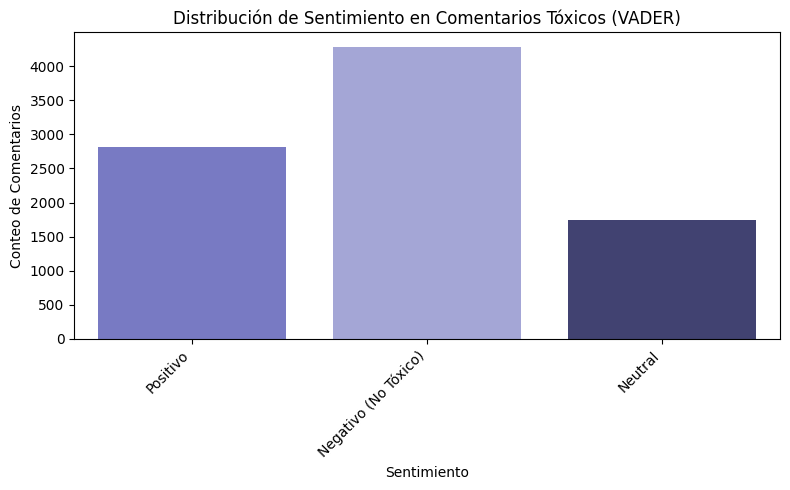

In [5]:
# --- Análisis de Sentimiento para Comentarios TÓXICOS ---
display_sentiment_breakdown(df, text_column='text', label_column='binary_label', label_value=1)

Un hallazgo notable es que un <b>31.80%</b> de los comentarios etiquetados como tóxicos muestran un sentimiento Positivo según VADER. Esto podría deberse a varias razones:
        <ul>
            <li><b>Sarcasmo o Ironía:</b> VADER, aunque robusto, puede tener dificultades con el sarcasmo. Un comentario como "great job, idiot!" podría ser clasificado como parcialmente positivo debido a "great job".</li>
            <li><b>Toxicidad del Ganador:</b> Comentarios tóxicos como "EZ" (fácil) después de ganar una partida, aunque son tóxicos para el perdedor, pueden ser percibidos como positivos por VADER debido a su connotación de victoria o facilidad.</li>
            <li><b>Contexto de las Palabras:</b> Palabras que VADER clasifica como positivas pueden aparecer en frases que en un contexto de juego son tóxicas (ej. "you are literally brain dead, but good one").</li>

In [6]:
# Ejemplos para entender bien el analisis de VADER
display_extreme_comments_by_sentiment(df, text_column='text', num_examples=3)


--- Ejemplos de Comentarios por Sentimiento Extremo y Toxicidad ---
Calculando 'sentiment' y 'compound_score' usando 'text' para todo el DataFrame...
Columnas 'sentiment' y 'compound_score' calculadas.

----- Comentarios No Tóxico -----

  > Más Positivos:
    1. (Score: 0.987) gg [SEPA] WP [SEPA] NICE [SEPA] STORM [SEPA] he knows [SEPA] how to use his passive xD [SEPA] XD [SEPA] XD [SEPA] THIS GUY iS HILARIOUS [SEPA] SOMEBODY TELL HIM [SEPA] HOW HIS PASSIVE WORKS XD
    2. (Score: 0.971) SOMeBODY TELL THIS STORM HOW TO USE HIs PASSIVE XD [SEPA] XD [SEPA] XD [SEPA] XD
    3. (Score: 0.970) gg [SEPA] our storm [SEPA] doesnt know how his passive works xD [SEPA] XD [SEPA] XD [SEPA] XD

  > Más Negativos (según VADER):
    1. (Score: -0.952) bully sf liek bully blind kid [SEPA] bully sf [SEPA] like bully blind kid [SEPA] its not good
    2. (Score: -0.949) die die die die [SEPA] let me farm
    3. (Score: -0.919) killer [SEPA] am killer [SEPA] danger

  > Neutrales (ejemplos aleatorios):


<h1 style="color:#6B7A8F;"><strong>Análisis de Sentimiento en Comentarios (VADER)</strong></h1>

<div style="background-color: #fff3cd; border-left: 5px solid #ffc107; padding: 10px; margin-top: 15px; border-radius: 5px; color: #664d03;">
    Es importante recordar que VADER es un analizador de sentimiento basado en un léxico general. Esto significa que interpreta las palabras por su carga emocional común en el idioma inglés, pero no tiene conocimiento del contexto específico, la jerga o el sarcasmo propios de un chat de juego. Esta distinción es crucial para entender las siguientes conclusiones.
</div>

<p>El análisis de sentimiento realizado con VADER sobre los comentarios originales (columna 'text') revela matices significativos sobre el tono emocional presente en el chat, tanto en los comentarios clasificados como no tóxicos como en los tóxicos.</p>

---

<h2 style="color:#6B7A8F;">Sentimiento en Comentarios NO TÓXICOS</h2>

<ul>
    <li>Casi la mitad de los comentarios no tóxicos son <b style="color:#e74c3c;">Neutros (46.06%)</b>, lo cual es esperable en mensajes informativos o interacciones sin carga emocional evidente.</li>
    <li>Un porcentaje significativo es <b style="color:#e74c3c;">Positivo (42.72%)</b>, reflejando la comunicación amistosa y positiva en el juego (ej., "gg", "wp"). Pero, como se vio en los ejemplos, VADER puede percibir como positivo comentarios que, en el contexto del juego, tienen un tono sarcástico o de burla hacia otros jugadores.</li>
    <li>Un <b style="color:#e74c3c;">11.22% de los comentarios no tóxicos muestran un Sentimiento Negativo</b> según VADER. Aunque no son etiquetados como tóxicos, sí expresan frustración, quejas o agresividad pasiva. Esto demuestra que la categoría "No Tóxico" puede incluir expresiones con tono negativo que no contienen insultos explícitos.</li>
</ul>

---

<h2 style="color:#6B7A8F;">Sentimiento en Comentarios TÓXICOS</h2>

<ul>
    <li>Como se esperaba, los comentarios tóxicos tienen en su mayoría un <b style="color:#e74c3c;">Sentimiento Negativo (48.44%)</b> según VADER.</li>
    <li>Sin embargo, un <b style="color:#e74c3c;">31.80%</b> de los comentarios tóxicos muestran un <b style="color:#e74c3c;">Sentimiento Positivo</b> y un <b style="color:#e74c3c;">19.76%</b> son <b style="color:#e74c3c;">Neutrales</b>. Esto evidencia que VADER puede malinterpretar el sarcasmo, ironía o insultos camuflados como halagos.</li>
    <ul>
        <li><b style="color:#e74c3c;">Sarcasmo e Ironía:</b> Frases como "YA EZ" o "gg wp nice play", aunque tienen palabras positivas, se usan como burla y toxicidad del ganador.</li>
        <li><b style="color:#e74c3c;">Toxicidad Contextual:</b> Términos que parecen neutros o positivos pueden ser profundamente ofensivos en el contexto del juego, algo que VADER no detecta.</li>
    </ul>
</ul>

---

<div style="background-color: #eaf6fd; border-left: 5px solid #3498db; padding: 15px; margin-top: 20px; border-radius: 5px;">
    <h2 style="color:#6B7A8F;">Conclusiones Clave y Justificación del Modelo</h2>
    <p>La <b style="color:#e74c3c;">divergencia entre el análisis de sentimiento de VADER y las etiquetas humanas</b> evidencia que:</p>
    <ul>
        <li>La toxicidad en chats de juego es <b style="color:#e74c3c;">compleja y matizada</b>. No se basa solo en lenguaje negativo, sino también en burla, sarcasmo o expresiones ofensivas camufladas.</li>
        <li>Comentarios "No Tóxicos" pueden tener <b style="color:#e74c3c;">tono negativo o frustrado</b> que no alcanza a ser clasificado como tóxico.</li>
    </ul>
    <p>En consecuencia, un simple clasificador de sentimiento no basta para detectar toxicidad en este dominio. Requiere un modelo entrenado específicamente para:</p>
    <ul>
        <li>Entender <b style="color:#e74c3c;">jerga de juegos</b>, <b style="color:#e74c3c;">sarcasmo</b> y <b style="color:#e74c3c;">contexto cultural</b>.</li>
        <li>Distinguir entre frustración legítima, comentarios negativos no tóxicos y toxicidad directa o sutil.</li>
    </ul>
    <p>Por ello, el próximo paso será aplicar un modelo de <b style="color:#e74c3c;">Machine Learning entrenado en nuestros datos</b>, capaz de detectar patrones de toxicidad específicos del entorno de juego.</p>
</div>


In [7]:
# --- Segunda limpieza de labels --- 
df = mark_specific_toxic_phrases(df)
# Ya que hemos encontrado que algunas de las positivas dnetro de las no toxiams eran toxicas he hecho una segunda limpieza
# Quiero que al modelo le llegue un df con el que entrenar lo más filtrado posible.
# Vamos a analizar de nuevo pero con el nuevo df:
run_basic_eda(df)
# Ejemplos para entender bien el analisis de VADER
display_extreme_comments_by_sentiment(df, text_column='text', num_examples=3)

# Guardamos nuevos cambios
#processed_data_path = '../data/processed/df_final_2.csv'
#os.makedirs(os.path.dirname(processed_data_path), exist_ok=True)
#df.to_csv(processed_data_path, index=False)


--- Estadísticas Básicas ---

Número total de comentarios: 38447
              Conteo  Porcentaje (%)
binary_label                        
0              29591       76.965693
1               8856       23.034307
Observación: La clase 'No Tóxico' es significativamente más abundante.
                   Conteo  Porcentaje (%)
multi_label                              
No Tóxico           27341       71.113481
Gravemente Tóxico    5995       15.592894
Levemente Tóxico     2861        7.441413
Acción/Juego         2250        5.852212
Observación: Las clases de toxicidad ('Levemente Tóxico', 'Gravemente Tóxico') son minoritarias.
                Conteo  Porcentaje (%)
original_label                        
O                26611       69.214763
E                 4711       12.253232
A                 2299        5.979660
I                 2274        5.914636
0                 1392        3.620569
2                  636        1.654225
1                  524        1.362915
Observación: Es

<h3 style="color:#6B7A8F;">Análisis de Cambios y Conclusiones Finales</h3>

<p>Observamos que comentarios positivos pero tóxicos (sarcasmo, burla) ahora están **correctamente clasificados** como tóxicos.</p>

<h4 style="color:#6B7A8F;">Conclusiones:</h4>
<ul>
    <li>Limitaciones de VADER: Se confirma que VADER, al ser léxico, no capta la toxicidad contextual o el sarcasmo.</li>
    <li>Dataset Refinado: Hemos mejorado la precisión del dataset, crucial para un entrenamiento robusto.</li>
    <li>Mejor Modelo Futuro: Con un dataset más limpio, el modelo de Machine Learning aprenderá a identificar la toxicidad real, incluso en frases ambiguas.</li>
</ul>

</body>
</html>